<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/knnclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Importing Libraries


In [32]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns

In [33]:
tel_df_copy = pd.read_csv('/content/sample_data/Cleaned_Telecom_Dataset_New.csv', index_col=0)
tel_df_copy.shape

(7032, 37)

In [34]:
tel_df_copy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,0,53.85,108.15,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


In [35]:
tel_df_copy.tail()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,PaperlessBilling_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
7038,0,84.80,1990.50,0,1,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,0
7039,0,103.20,7362.90,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,0,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
7041,1,74.40,306.60,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7042,0,105.65,6844.50,0,1,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(tel_df_copy.drop(['Churn'],axis = 1))
scaled_features = scaler.transform(tel_df_copy.drop('Churn',axis = 1))

Feature Selection

In [37]:
X = scaled_features
Y = tel_df_copy['Churn']


Train Test Split

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=42)

WITH PYTHON PACKAGE

In [39]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=30)

In [40]:
pred_knn = knn.predict(X_test)

**Calculating error**

The error rate is found by comparing `pred_i` (predicted labels) with `Y_test` (actual labels). `pred_i != Y_test` generates a list of True (wrong predictions) and False (correct predictions). `np.mean(pred_i != Y_test)` calculates the percentage of wrong predictions. This error rate is then added to the `error_rate` list.

In [41]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

error_rate

[0.2834123222748815,
 0.26303317535545023,
 0.25687203791469193,
 0.24170616113744076,
 0.24597156398104264,
 0.23127962085308057,
 0.22843601895734597,
 0.2241706161137441,
 0.22464454976303316,
 0.218957345971564,
 0.22274881516587677,
 0.218957345971564,
 0.22227488151658767,
 0.21753554502369668,
 0.21800947867298578,
 0.21706161137440758,
 0.2161137440758294,
 0.21658767772511847,
 0.21658767772511847,
 0.20900473933649288,
 0.2127962085308057,
 0.209478672985782,
 0.21137440758293838,
 0.20616113744075829,
 0.2132701421800948,
 0.2099526066350711,
 0.21374407582938387,
 0.21374407582938387,
 0.21374407582938387,
 0.2156398104265403,
 0.2161137440758294,
 0.21421800947867298,
 0.218957345971564,
 0.21753554502369668,
 0.22037914691943128,
 0.2161137440758294,
 0.218957345971564,
 0.21421800947867298,
 0.21421800947867298]

Text(0, 0.5, 'Error Rate')

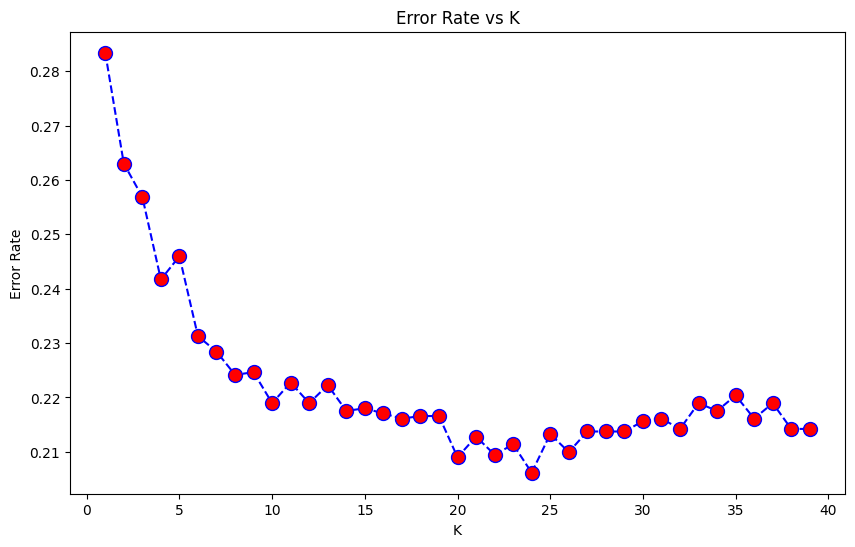

In [42]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

**Optimal Range for k:**
The lowest error rates are observed around
𝑘
=
20
−
35
k=20−35. This range seems to be the optimal choice for the number of neighbors in this specific dataset, as it minimizes the error rate.

Accuracy

In [43]:
accu_score=accuracy_score(Y_test, pred_knn)
print(f"Accuracy score: {accu_score}")

Accuracy score: 0.7843601895734598


Classification Report

In [44]:
print(classification_report(Y_test, pred_knn))


              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1549
           1       0.61      0.54      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110



Confusion Matrix

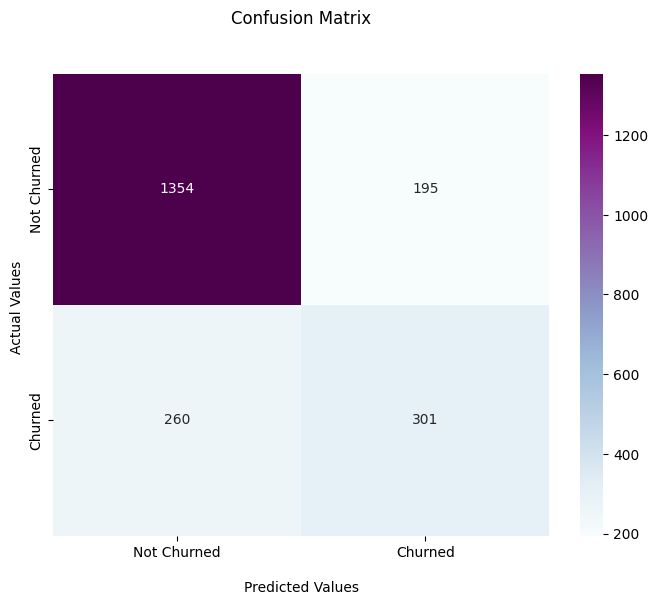

In [45]:
confusion_matrix_knn = confusion_matrix(Y_test, pred_knn)
cm1 = np.array(confusion_matrix_knn)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm1, annot=True, cmap='BuPu', fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

SMOTEENN

In [46]:
sm = SMOTE(random_state=42)
sm = SMOTEENN(smote = sm)
X_resampled, Y_resampled = sm.fit_resample(X,Y)

Train Test Split

In [47]:
Xr_train, Xr_test, Yr_train, Yr_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state = 42)


In [48]:
model_knn_smote = KNeighborsClassifier(n_neighbors = 30)
model_knn_smote.fit(Xr_train,Yr_train)

KNeighborsClassifier(n_neighbors=30)

In [49]:
Yr_pred = model_knn_smote.predict(Xr_test)
Yr_pred

array([0, 0, 1, ..., 0, 0, 1])

Accuracy

In [50]:
accu_score=accuracy_score(Yr_test, Yr_pred)
print(f"Accuracy score: {accu_score}")

Accuracy score: 0.9040953862104717


Classification Report

In [51]:
print(classification_report(Yr_test, Yr_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89       881
           1       0.88      0.96      0.92      1048

    accuracy                           0.90      1929
   macro avg       0.91      0.90      0.90      1929
weighted avg       0.91      0.90      0.90      1929



Confusion Matrix after Smoteenn

In [52]:
cm2 = confusion_matrix(Yr_test, Yr_pred)
cm2

array([[ 738,  143],
       [  42, 1006]])

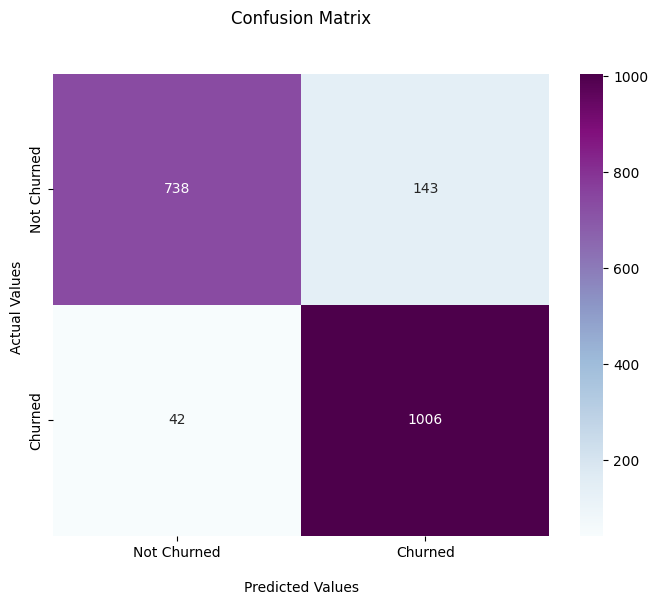

In [53]:
cm2 = np.array(cm2)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm2, annot=True, cmap='BuPu', fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

Now we can see quite better results, i.e. Accuracy: 90%, and a very good Recall, Precision & F1 score for minority class.

KNN Classification without python package of KNeighborsClassifier

In [54]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# Function to implement KNN classification
def knn_predict(X_train, X_test, Y_train, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for train_point, label in zip(X_train, Y_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, label))

        # Sort distances and get k nearest neighbors
        distances = sorted(distances)[:k]
        neighbors = [label for _, label in distances]

        # Predict the class with majority vote
        pred = max(set(neighbors), key=neighbors.count)
        y_pred.append(pred)

    return y_pred

In [24]:
# Calculate error rate for each k value from 1 to 39
error_rate = []
for k in range(1, 40):
    pred_knn = knn_predict(X_train, X_test, Y_train, k)
    error = np.mean(pred_knn != Y_test)
    error_rate.append(error)

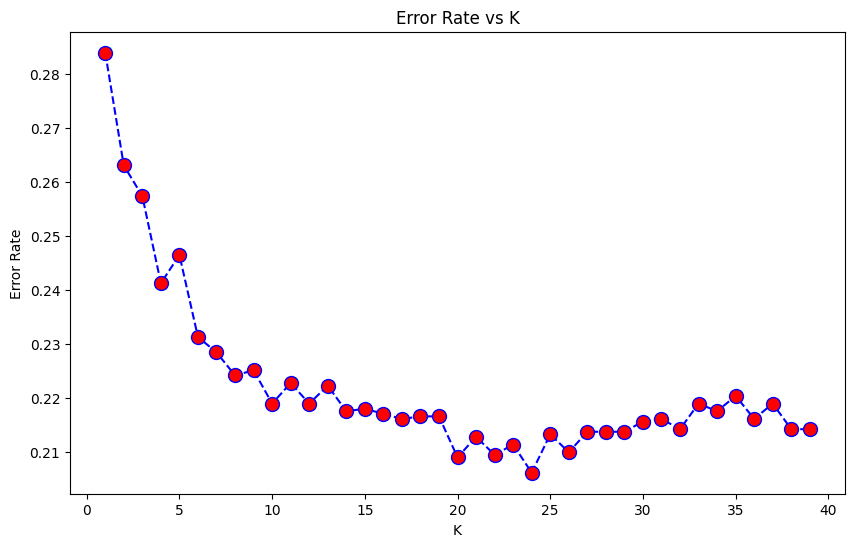

In [25]:
# Plot error rate vs. K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

Before Smoteenn

In [26]:
# Predicting with K=30
k_wp = 30
pred_knn_wp = knn_predict(X_train, X_test, Y_train, k_wp)

Accuracy and other metrics

In [27]:
# Convert predictions and true labels to numpy arrays
Y_test_report = np.array(Y_test)
pred_knn_report = np.array(pred_knn_wp)

# Initialize counts dictionary
counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

# Count TP, FP, TN, FN
for yt, yp in zip(Y_test_report, pred_knn_report):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics dictionary
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate metrics for each class
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy
total_correct = sum(counts['TP'].values())
total_predictions = len(Y_test)
metrics['accuracy'] = total_correct / total_predictions

# Print metrics
print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")

Accuracy: 0.7843601895734598
Precision for class 0: 0.838909541511772
Recall for class 0: 0.8741123305358296
F1 Score for class 0: 0.8561492254189061
Precision for class 1: 0.6068548387096774
Recall for class 1: 0.5365418894830659
F1 Score for class 1: 0.5695364238410596


Accuracy 78%, same as was computed using python package

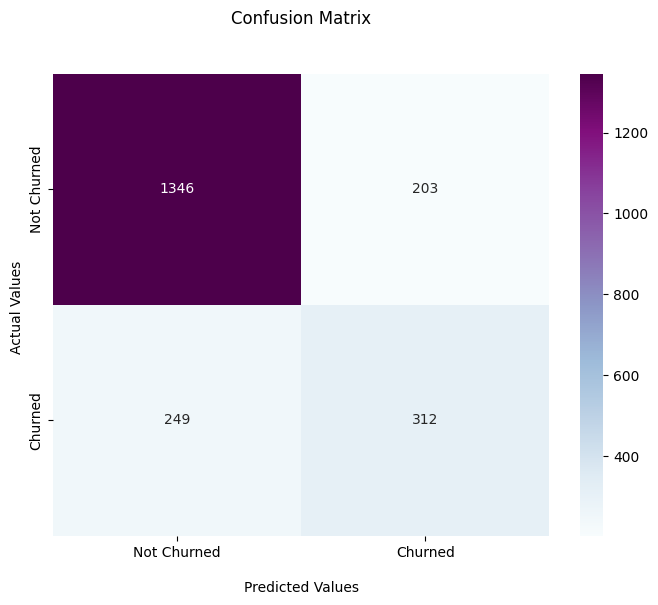

In [28]:
# Generate confusion matrix
cm2 = confusion_matrix(Y_test, pred_knn)
cm2
cm2 = np.array(cm2)
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm2, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])
## Display the visualization of the Confusion Matrix.
plt.show()

KNN Classifier without package after Smoteenn

In [29]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, Y_resampled = smote_enn.fit_resample(X_train, Y_train)


In [30]:
# Split the resampled data into training and testing sets
Xr_train_wp, Xr_test_wp, Yr_train_wp, Yr_test_wp = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=42)

# Predicting with K=30 on the resampled test set
knn_wp_s = knn_predict(Xr_train_wp, Xr_test_wp, Yr_train_wp, k=30)

Performance on Resampled Dataset

In [31]:
# Convert predictions and true labels to numpy arrays
Yr_test_report = np.array(Yr_test_wp)
pred_knn_report = np.array(knn_wp_s)

# Initialize counts dictionary
counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

# Count TP, FP, TN, FN
for yt, yp in zip(Yr_test_report, pred_knn_report):
    if yt == yp:
        counts['TP'][yt] += 1
        counts['TN'][1 - yt] += 1
    else:
        counts['FP'][yp] += 1
        counts['FN'][yt] += 1

# Initialize metrics dictionary
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

# Calculate metrics for each class
for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]
    TN = counts['TN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy
total_correct = sum(counts['TP'].values())
total_predictions = len(Yr_test_report)
metrics['accuracy'] = total_correct / total_predictions

# Print metrics
print("Performance on Resampled Dataset")
print(f"Accuracy: {metrics['accuracy']}")
print(f"Precision for class 0: {metrics['precision'][0]}")
print(f"Recall for class 0: {metrics['recall'][0]}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]}")
print(f"Precision for class 1: {metrics['precision'][1]}")
print(f"Recall for class 1: {metrics['recall'][1]}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]}")

Performance on Resampled Dataset
Accuracy: 0.9042089985486212
Precision for class 0: 0.9652650822669104
Recall for class 0: 0.8237129485179407
F1 Score for class 0: 0.8888888888888888
Precision for class 1: 0.8640192539109507
Recall for class 1: 0.9742198100407056
F1 Score for class 1: 0.9158163265306123


Accuracy 90%, same as was computed with python package.